In [1]:
import amrex.space3d as amr
import numpy as np
import matplotlib.pyplot as plt
import os

from matplotlib.animation import FFMpegWriter, FuncAnimation
from matplotlib.colors import Normalize
from IPython.display import display, Video

if not amr.initialized():
    amr.initialize([])

Initializing AMReX (24.07)...
MPI initialized with 1 MPI processes
MPI initialized with thread support level 0
AMReX (24.07) initialized


In [2]:
plt_directory = "/home/qfister/aa_Project/FHDeX/exec/immersed_boundary/taylor_line/new_plt_data"
plot_files = sorted([os.path.join(plt_directory, f) for f in os.listdir(plt_directory) if f.startswith('plt')])
print("this time quinton was here")

this time quinton was here


In [3]:
def generate_frame(plt_filename):
    plt_data = amr.PlotFileData(plt_filename)
    dom = plt_data.probDomain(0)
    box_size = [i + 1 for i in dom.hi_vect]
    center = [int(i / 2) for i in dom.hi_vect]
    
    mfab_pres = plt_data.get(0, "pres")
    pres_data = np.zeros(box_size)
    for mfi in mfab_pres:
        marr = mfab_pres.array(mfi)
        vb = mfi.validbox()
        lo = list(vb.lo_vect)
        hi = list(vb.hi_vect)
        data = marr.to_xp()[:, :, :, 0]
        pres_data[lo[0]:hi[0] + 1, lo[1]:hi[1] + 1, lo[2]:hi[2] + 1] = data

    mfab_cc_forcex = plt_data.get(0, "cc_forcex")
    cc_forcex_data = np.zeros(box_size)
    for mfi in mfab_cc_forcex:
        marr = mfab_cc_forcex.array(mfi)
        vb = mfi.validbox()
        lo = list(vb.lo_vect)
        hi = list(vb.hi_vect)
        data = marr.to_xp()[:, :, :, 0]
        cc_forcex_data[lo[0]:hi[0] + 1, lo[1]:hi[1] + 1, lo[2]:hi[2] + 1] = data

    mfab_cc_forcey = plt_data.get(0, "cc_forcey")
    cc_forcey_data = np.zeros(box_size)
    for mfi in mfab_cc_forcey:
        marr = mfab_cc_forcey.array(mfi)
        vb = mfi.validbox()
        lo = list(vb.lo_vect)
        hi = list(vb.hi_vect)
        data = marr.to_xp()[:, :, :, 0]
        cc_forcey_data[lo[0]:hi[0] + 1, lo[1]:hi[1] + 1, lo[2]:hi[2] + 1] = data
    
    return np.transpose(pres_data[:, :, center[1]]), np.transpose(cc_forcex_data[:, :, center[1]]), np.transpose(cc_forcey_data[:, :, center[1]])

In [4]:
def update(frame):
    ax.clear()
    
    pres_frame, cc_forcex_frame, cc_forcey_frame = frame
    im = ax.matshow(pres_frame, cmap='twilight', norm=norm)
    X, Y = np.meshgrid(np.arange(pres_frame.shape[1]), np.arange(pres_frame.shape[0]))
    scale_factor = 0.1
    arrow_scale = 0.01
    quiver_scale = 3  # arrow size scale
    
    ax.quiver(X, Y, cc_forcex_frame * scale_factor * arrow_scale, cc_forcey_frame * scale_factor * arrow_scale, 
              color="red", angles='xy', scale_units='xy', width=0.004, scale=quiver_scale)
    
    return im

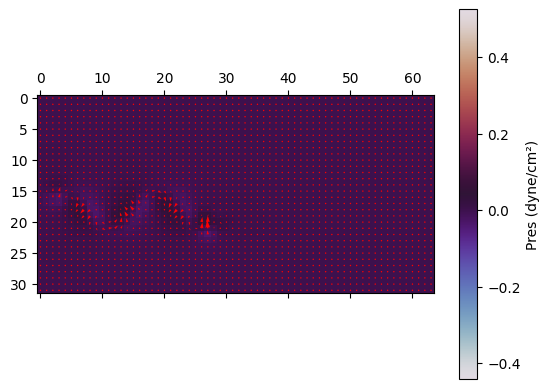

In [6]:
fig, ax = plt.subplots()

frames = [generate_frame(f) for f in plot_files]

norm = Normalize(vmin=np.min([f[0] for f in frames]), vmax=np.max([f[0] for f in frames]))
sm = plt.cm.ScalarMappable(cmap='twilight', norm=norm)
sm.set_array([])


cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Pres (dyne/cm²)')

ani = FuncAnimation(fig, update, frames=frames, repeat=False)
output_video = os.path.join(plt_directory, "animation_with_vectors.mp4")
ani.save(output_video, writer=FFMpegWriter(fps=20))

display(Video(output_video, embed=True))